In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.shape

(381109, 12)

In [4]:
# Have a look at the Age data:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

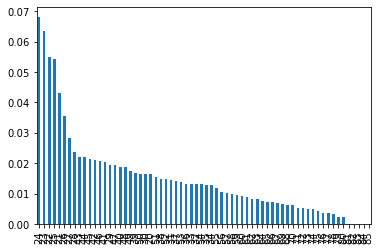

In [5]:
df['Age'].value_counts(normalize=True).plot(kind="bar");
# OR:
#(df['Age'].value_counts()/df.shape[0]).plot(kind="bar");

In [6]:
# Total nbr of customers that already have a vehicle insurance
df_ins = df[df['Previously_Insured']==1]
# Total nbr of customers that are interested in a vehicle insurance
df_pos = df[df['Response']==1]

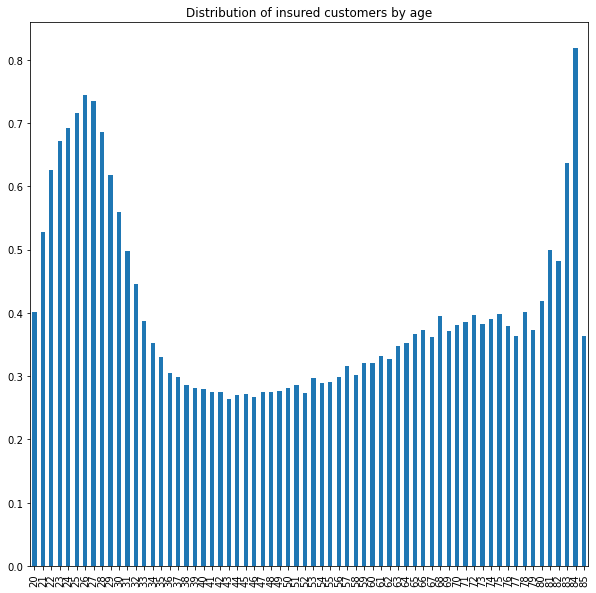

In [7]:
# How are the already insured customers distributed by age? (normalized distribution)
(df_ins['Age'].value_counts()/df['Age'].value_counts()).plot(kind="bar",figsize=[10,10]);
plt.title("Distribution of insured customers by age");

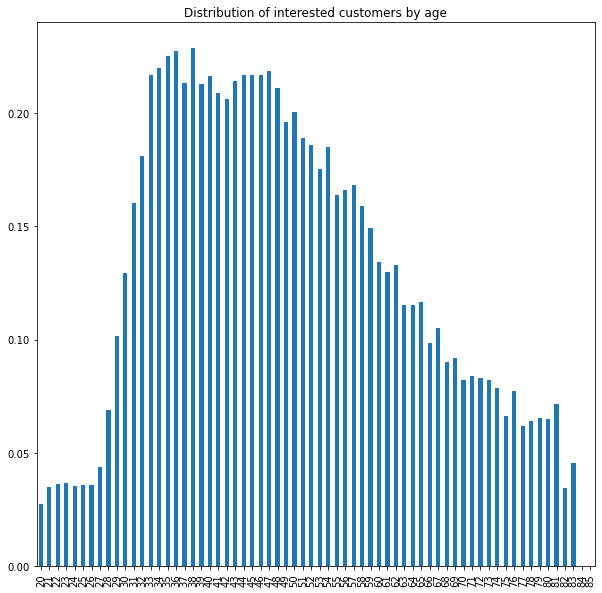

In [8]:
# How are the customers interested in a vehicle insurance distributed by age? (normalized distribution)
(df_pos['Age'].value_counts()/df['Age'].value_counts()).plot(kind="bar",figsize=[10,10]);
plt.title("Distribution of interested customers by age");